Instead of manually updating weights, we can use optimizers to automate the process as manual updation isn't scalable to large neural nets.

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
x_train = np.random.rand(100, 1)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33
print(x_train.shape, y_train.shape)

(100, 1) (100, 1)


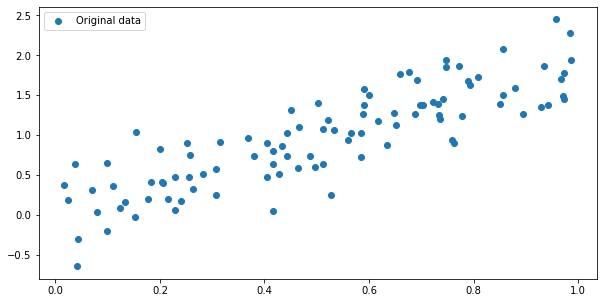

In [3]:
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, label='Original data')
plt.legend()
plt.show();

In [14]:
X = torch.from_numpy(x_train).float()
Y = torch.from_numpy(y_train).float()
print(X.shape, Y.shape)

torch.Size([100, 1]) torch.Size([100, 1])


In [15]:
INPUT = 1
HIDDEN = 5
OUTPUT = 1

In [16]:
# Using the nn package from PyTorch to define our model
model = torch.nn.Sequential(
    torch.nn.Linear(INPUT, HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(HIDDEN, OUTPUT),
)

loss_fn = torch.nn.MSELoss(reduction='sum')

LEARNING_RATE = 1e-4
EPOCHS = 1000

for epoch in range(1, EPOCHS + 1):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)

    if epoch % 100 == 0:
        print(epoch, loss.item())

    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= param.grad * LEARNING_RATE

100 43.374656677246094
200 37.17906951904297
300 32.172733306884766
400 27.406387329101562
500 22.77775764465332
600 18.5896053314209
700 15.225881576538086
800 12.874643325805664
900 11.441803932189941
1000 10.66782283782959


In [17]:
y_pred = model(X)
y_pred = y_pred.detach().numpy()
print(f'R2 score: {r2_score(y_train, y_pred)}')

R2 score: 0.7146388944194086


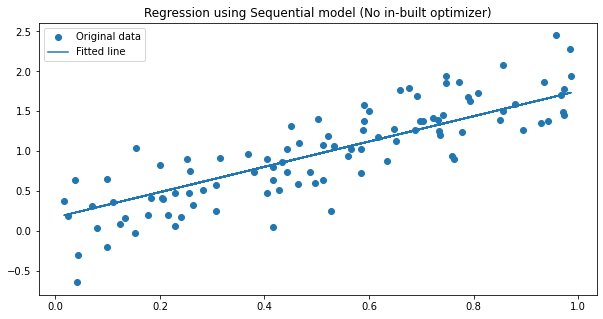

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, label='Original data')
plt.plot(x_train, y_pred, label='Fitted line')
plt.title('Regression using Sequential model (No in-built optimizer)')
plt.legend()
plt.show();

100 16.790363311767578
200 14.459084510803223
300 12.811400413513184
400 11.69360065460205
500 10.982155799865723
600 10.55088996887207
700 10.29992389678955
800 10.156283378601074
900 10.075279235839844
1000 10.029603958129883
R2 score: 0.7315850771264341


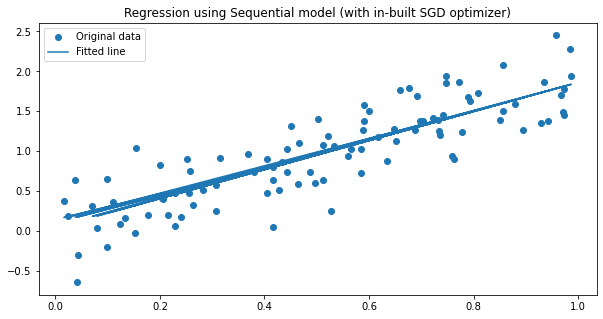

In [20]:
# Using the optim package from PyTorch to define our optimizer

model = torch.nn.Sequential(
    torch.nn.Linear(INPUT, HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(HIDDEN, OUTPUT),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

LEARNING_RATE = 1e-4
EPOCHS = 1000
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

for epoch in range(1, EPOCHS + 1):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)

    if epoch % 100 == 0:
        print(epoch, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

y_pred = model(X)
y_pred = y_pred.detach().numpy()
print(f'R2 score: {r2_score(y_train, y_pred)}')

plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, label='Original data')
plt.plot(x_train, y_pred, label='Fitted line')
plt.title('Regression using Sequential model (with in-built SGD optimizer)')
plt.legend()
plt.show();

In [22]:
import pandas as pd
import seaborn as sns
import sklearn

In [28]:
df = pd.read_csv('data/bike_sharing', index_col=0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [29]:
df.shape

(731, 16)

In [31]:
columns = ['registered', 'holiday', 'weekday',
            'weathersit', 'temp', 'atemp', 'season']
features = df[columns]

In [32]:
features = pd.get_dummies(features, columns=['season'])
features.sample(5)

,registered,holiday,weekday,weathersit,temp,atemp,season_fall,season_spring,season_summer,season_winter
318,3746,0,2,2,0.530000,0.507579,0,0,0,1
294,2809,0,6,1,0.422500,0.425492,0,0,0,1
713,5182,0,5,1,0.281667,0.294192,0,0,0,1
392,3248,0,6,1,0.315833,0.326379,0,1,0,0
533,4344,0,0,1,0.592500,0.571975,0,0,1,0


In [37]:
target = df[['cnt']]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 10), (147, 10), (584, 1), (147, 1))

In [40]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)

Y_train_tensor = torch.tensor(y_train.values, dtype=torch.float)
Y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

print(f'X_train_tensor.shape: {X_train_tensor.shape}')
print(f'X_test_tensor.shape: {X_test_tensor.shape}')
print(f'Y_train_tensor.shape: {Y_train_tensor.shape}')
print(f'Y_test_tensor.shape: {Y_test_tensor.shape}')

X_train_tensor.shape: torch.Size([584, 10])
X_test_tensor.shape: torch.Size([147, 10])
Y_train_tensor.shape: torch.Size([584, 1])
Y_test_tensor.shape: torch.Size([147, 1])


In [41]:
import torch.utils.data as data_utils # Helper class for common data loading tasks

In [44]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = data_utils.DataLoader(train_data, batch_size=64, shuffle=True)
print(f'Number of batches: {len(train_loader)}')

Number of batches: 10


In [45]:
features_batch, target_batch = iter(train_loader).next()

In [46]:
features_batch.shape, target_batch.shape

(torch.Size([64, 10]), torch.Size([64, 1]))

In [47]:
INPUT = features_batch.shape[1]
HIDDEN = 10
OUTPUT = 1

loss_fn = torch.nn.MSELoss()

model = torch.nn.Sequential(
    torch.nn.Linear(INPUT, HIDDEN),
    torch.nn.Linear(HIDDEN, OUTPUT)
)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

total_steps = len(train_loader)

EPOCHS = 10000

for epoch in range(1, EPOCHS + 1):
    for i, (features_batch, target_batch) in enumerate(train_loader):

        output = model(features_batch)
        loss = loss_fn(output, target_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 2000 == 0:
            print(f'Epoch [{epoch}/{EPOCHS}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

Epoch [2000/10000], Step [1/10], Loss: 351226.3125
Epoch [2000/10000], Step [2/10], Loss: 412645.3125
Epoch [2000/10000], Step [3/10], Loss: 628066.0000
Epoch [2000/10000], Step [4/10], Loss: 431821.2812
Epoch [2000/10000], Step [5/10], Loss: 200270.2500
Epoch [2000/10000], Step [6/10], Loss: 343241.5000
Epoch [2000/10000], Step [7/10], Loss: 387356.3438
Epoch [2000/10000], Step [8/10], Loss: 382571.0625
Epoch [2000/10000], Step [9/10], Loss: 180761.1875
Epoch [2000/10000], Step [10/10], Loss: 96625.2188
Epoch [4000/10000], Step [1/10], Loss: 258806.4531
Epoch [4000/10000], Step [2/10], Loss: 429793.8125
Epoch [4000/10000], Step [3/10], Loss: 284700.0312
Epoch [4000/10000], Step [4/10], Loss: 299439.2812
Epoch [4000/10000], Step [5/10], Loss: 544750.2500
Epoch [4000/10000], Step [6/10], Loss: 304346.0625
Epoch [4000/10000], Step [7/10], Loss: 231357.9219
Epoch [4000/10000], Step [8/10], Loss: 318215.6875
Epoch [4000/10000], Step [9/10], Loss: 373421.8750
Epoch [4000/10000], Step [10/10

R2 score: 0.9413


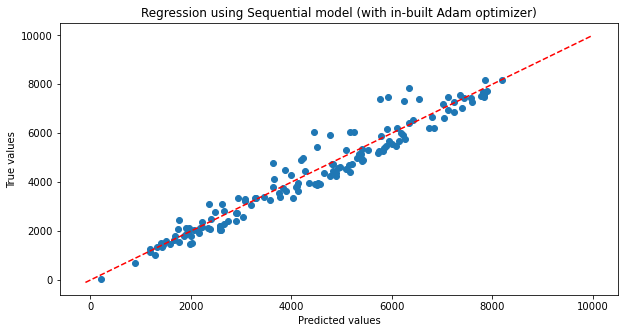

In [53]:
model.eval() # Dropout and batch normalization layers behave differently during evaluation

with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = y_pred.detach().numpy()
print(f'R2 score: {r2_score(y_test, y_pred):.4f}')

plt.figure(figsize=(10, 5))

plt.scatter(y_pred, y_test)
plt.plot([-100, 10000], [-100, 10000], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Regression using Sequential model (with in-built Adam optimizer)')
plt.show();

Epoch [5000/10000], Step [1/10], Loss: 358330.8125
Epoch [5000/10000], Step [2/10], Loss: 351898.6875
Epoch [5000/10000], Step [3/10], Loss: 305637.8750
Epoch [5000/10000], Step [4/10], Loss: 316956.8438
Epoch [5000/10000], Step [5/10], Loss: 368832.7812
Epoch [5000/10000], Step [6/10], Loss: 357367.5938
Epoch [5000/10000], Step [7/10], Loss: 390789.3750
Epoch [5000/10000], Step [8/10], Loss: 478872.5625
Epoch [5000/10000], Step [9/10], Loss: 231459.6875
Epoch [5000/10000], Step [10/10], Loss: 695316.0625
Epoch [10000/10000], Step [1/10], Loss: 287513.9375
Epoch [10000/10000], Step [2/10], Loss: 232717.2500
Epoch [10000/10000], Step [3/10], Loss: 386279.4062
Epoch [10000/10000], Step [4/10], Loss: 370691.1562
Epoch [10000/10000], Step [5/10], Loss: 293095.2500
Epoch [10000/10000], Step [6/10], Loss: 226618.9062
Epoch [10000/10000], Step [7/10], Loss: 401352.7500
Epoch [10000/10000], Step [8/10], Loss: 386568.7812
Epoch [10000/10000], Step [9/10], Loss: 302691.9688
Epoch [10000/10000], 

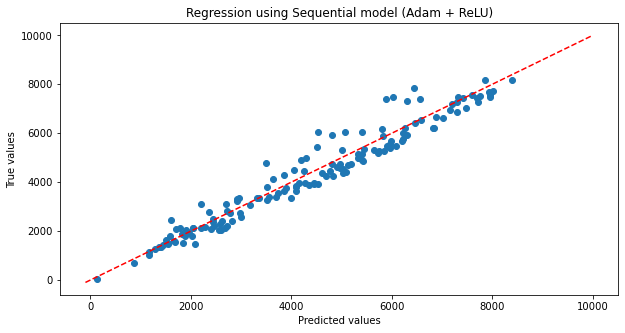

In [55]:
INPUT = features_batch.shape[1]
HIDDEN = 10
OUTPUT = 1

loss_fn = torch.nn.MSELoss()

model = torch.nn.Sequential(
    torch.nn.Linear(INPUT, HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(HIDDEN, OUTPUT)
)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

total_steps = len(train_loader)

EPOCHS = 10000

for epoch in range(1, EPOCHS + 1):
    for i, (features_batch, target_batch) in enumerate(train_loader):

        output = model(features_batch)
        loss = loss_fn(output, target_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 5000 == 0:
            print(f'Epoch [{epoch}/{EPOCHS}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

model.eval() # Dropout and batch normalization layers behave differently during evaluation

with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = y_pred.detach().numpy()
print(f'R2 score: {r2_score(y_test, y_pred):.4f}')

plt.figure(figsize=(10, 5))

plt.scatter(y_pred, y_test)
plt.plot([-100, 10000], [-100, 10000], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Regression using Sequential model (Adam + ReLU)')
plt.show();

Epoch [5000/10000], Step [1/10], Loss: 1789636.1250
Epoch [5000/10000], Step [2/10], Loss: 1830204.1250
Epoch [5000/10000], Step [3/10], Loss: 1842553.3750
Epoch [5000/10000], Step [4/10], Loss: 1382850.0000
Epoch [5000/10000], Step [5/10], Loss: 1300838.6250
Epoch [5000/10000], Step [6/10], Loss: 1635635.8750
Epoch [5000/10000], Step [7/10], Loss: 1390239.2500
Epoch [5000/10000], Step [8/10], Loss: 1109577.2500
Epoch [5000/10000], Step [9/10], Loss: 1644196.7500
Epoch [5000/10000], Step [10/10], Loss: 1651344.8750
Epoch [10000/10000], Step [1/10], Loss: 2274905.2500
Epoch [10000/10000], Step [2/10], Loss: 1957268.7500
Epoch [10000/10000], Step [3/10], Loss: 1494132.1250
Epoch [10000/10000], Step [4/10], Loss: 1439060.5000
Epoch [10000/10000], Step [5/10], Loss: 1742885.1250
Epoch [10000/10000], Step [6/10], Loss: 1640838.1250
Epoch [10000/10000], Step [7/10], Loss: 1524911.0000
Epoch [10000/10000], Step [8/10], Loss: 1837059.3750
Epoch [10000/10000], Step [9/10], Loss: 1205525.0000
Ep

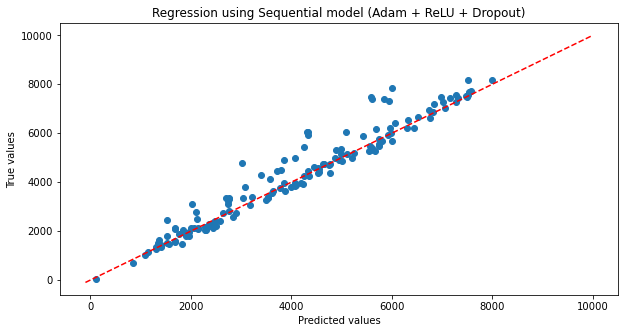

In [57]:
INPUT = features_batch.shape[1]
HIDDEN = 10
OUTPUT = 1

loss_fn = torch.nn.MSELoss()

model = torch.nn.Sequential(
    torch.nn.Linear(INPUT, HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2), # Dropout layer with 20% probability -- Reduce overfitting
    torch.nn.Linear(HIDDEN, OUTPUT)
)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

total_steps = len(train_loader)

EPOCHS = 10000

for epoch in range(1, EPOCHS + 1):
    for i, (features_batch, target_batch) in enumerate(train_loader):

        output = model(features_batch)
        loss = loss_fn(output, target_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 5000 == 0:
            print(f'Epoch [{epoch}/{EPOCHS}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

model.eval() # Dropout and batch normalization layers behave differently during evaluation

with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred = y_pred.detach().numpy()
print(f'R2 score: {r2_score(y_test, y_pred):.4f}')

plt.figure(figsize=(10, 5))

plt.scatter(y_pred, y_test)
plt.plot([-100, 10000], [-100, 10000], 'r--')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Regression using Sequential model (Adam + ReLU + Dropout)')
plt.show();

In [58]:
import gc
gc.collect()

34876